### Lendo as features já tratadas

In [1]:
import pandas as pd

In [2]:
X = pd.read_csv('Features_Clean.csv')

In [3]:
X.head()

,Pclass,Age,Fare,Sex_female,Sex_male
0,0.827377,-0.592494,-0.502445,-0.737695,0.737695
1,-1.566107,0.638776,0.786845,1.355574,-1.355574
2,0.827377,-0.284677,-0.488854,1.355574,-1.355574
3,-1.566107,0.407912,0.420730,1.355574,-1.355574
4,0.827377,0.407912,-0.486337,-0.737695,0.737695


### Pegando o y do dataframe não tratado

In [4]:
data = pd.read_csv('train.csv')
y = data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Separando em teste e treino:

In [28]:
from sklearn.model_selection import train_test_split
import numpy as np

seed = 1

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

### Importando e Aplicando SVM com RandomizedSearchCV

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [31]:
#Definindo o modelo
model = SVC()

In [32]:
# Definindo parâmetros a serem ajustados
#djust_kernel = ['rbf', 'poly', 'sigmoid']
adjust_C = np.arange(1,10000,10)
adjust_gamma = np.arange(0,100,1)

random_grid = {'C': adjust_C, 'gamma': adjust_gamma}

SVM_model_adjust = RandomizedSearchCV(estimator=model, param_distributions=random_grid, verbose=1, n_jobs=-1, n_iter=50)

hyperparam_model = SVM_model_adjust.fit(X_train, y_train)

pd.DataFrame(hyperparam_model.cv_results_).sort_values('rank_test_score', ascending=True).head(10)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.5min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
37,5.858488,2.105715,0.012998,0.014016,2,6491,"{'gamma': 2, 'C': 6491}",0.748252,0.727273,0.795775,0.739437,0.788732,0.759894,0.027340,1
17,7.447725,2.760769,0.005898,0.000662,2,9831,"{'gamma': 2, 'C': 9831}",0.734266,0.727273,0.781690,0.746479,0.774648,0.752871,0.021666,2
41,2.449782,1.255188,0.013015,0.012503,11,1551,"{'gamma': 11, 'C': 1551}",0.720280,0.713287,0.760563,0.767606,0.774648,0.747277,0.025390,3
1,7.533721,5.329950,0.020988,0.015496,8,4801,"{'gamma': 8, 'C': 4801}",0.720280,0.706294,0.732394,0.781690,0.760563,0.740244,0.027362,4
8,0.356107,0.133696,0.016991,0.018493,31,241,"{'gamma': 31, 'C': 241}",0.720280,0.734266,0.732394,0.753521,0.760563,0.740205,0.014731,5
10,2.672772,1.114296,0.013792,0.015097,13,4681,"{'gamma': 13, 'C': 4681}",0.720280,0.706294,0.739437,0.767606,0.739437,0.734610,0.020700,6
9,0.367412,0.114400,0.038496,0.032127,47,301,"{'gamma': 47, 'C': 301}",0.720280,0.720280,0.732394,0.746479,0.753521,0.734591,0.013521,7
32,1.350615,0.771882,0.008230,0.001416,21,2761,"{'gamma': 21, 'C': 2761}",0.685315,0.727273,0.746479,0.760563,0.732394,0.730405,0.025357,8
7,3.948771,2.421108,0.012992,0.013000,17,8571,"{'gamma': 17, 'C': 8571}",0.685315,0.720280,0.746479,0.753521,0.732394,0.727598,0.024054,9
14,1.712950,1.285729,0.023007,0.019974,22,4181,"{'gamma': 22, 'C': 4181}",0.692308,0.713287,0.739437,0.753521,0.732394,0.726189,0.021333,10


In [33]:
hiperparametros = hyperparam_model.best_params_
hiperparametros

{'gamma': 2, 'C': 6491}

In [34]:
modelo_otimizado = SVC(kernel='rbf', C=6491, gamma=2)

In [35]:
modelo_otimizado.fit(X_train, y_train)
predictions = modelo_otimizado.predict(X_test)

In [36]:
import numpy as np
y_test = np.asarray(y_test)


### Avaliação do Modelo

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       106
           1       0.75      0.59      0.66        73

    accuracy                           0.75       179
   macro avg       0.75      0.73      0.73       179
weighted avg       0.75      0.75      0.75       179

Confusion matrix, without normalization
[[92 14]
 [30 43]]


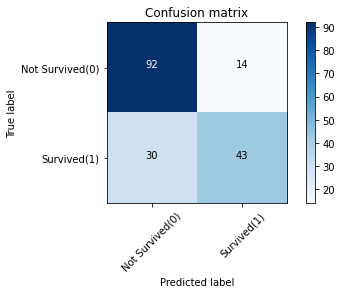

In [39]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predictions))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not Survived(0)','Survived(1)'], title='Confusion matrix')

In [40]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions, average='weighted')

0.7476880857063156

### Predizendo e Exportando os dados

In [41]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
features = ['Pclass','Sex', 'Age', 'Fare']

In [43]:
X_pred = pd.get_dummies(test_data[features])

In [44]:
X_pred.tail()

,Pclass,Age,Fare,Sex_female,Sex_male
413,3,NaN,8.0500,0,1
414,1,39.0,108.9000,1,0
415,3,38.5,7.2500,0,1
416,3,NaN,8.0500,0,1
417,3,NaN,22.3583,0,1


In [45]:
media_idade = X_pred.Age.mean()
X_pred = X_pred.fillna(value=media_idade.round(2))

In [46]:
X_pred.tail()

,Pclass,Age,Fare,Sex_female,Sex_male
413,3,30.27,8.0500,0,1
414,1,39.00,108.9000,1,0
415,3,38.50,7.2500,0,1
416,3,30.27,8.0500,0,1
417,3,30.27,22.3583,0,1


In [47]:
from sklearn.preprocessing import StandardScaler
pred_scaler = StandardScaler()
X_pred = pd.DataFrame(pred_scaler.fit_transform(X_pred), columns = X_pred.columns)

In [48]:
X_pred.head()

,Pclass,Age,Fare,Sex_female,Sex_male
0,0.873482,0.335035,-0.498172,-0.755929,0.755929
1,0.873482,1.325572,-0.513039,1.322876,-1.322876
2,-0.315819,2.514217,-0.464854,-0.755929,0.755929
3,0.873482,-0.259288,-0.483231,-0.755929,0.755929
4,0.873482,-0.655503,-0.418237,1.322876,-1.322876


In [49]:
final_pred = modelo_otimizado.predict(X_pred)

In [52]:
output = pd.DataFrame({'PassengerID': test_data.PassengerId, 'Survived': final_pred})
output.to_csv('SVMSubmission_RandomizedSearchCV_otimizado.csv', index=False)

In [51]:
final_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,